<a href="https://colab.research.google.com/github/manognabulle/Machine-learning/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!

## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.

**How to get started?**
*  Go to [Google AI Studio](https://aistudio.google.com/) and log in with your Google account.
*  [Create an API key](https://aistudio.google.com/app/apikey).
* Use a quickstart for [Python](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb), or call the REST API using [curl](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb).

**Discover Gemini's advanced capabilities**
*  Play with Gemini [multimodal outputs](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb), mixing text and images in an iterative way.
*  Discover the [multimodal Live API](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb ) (demo [here](https://aistudio.google.com/live)).
*  Learn how to [analyze images and detect items in your pictures](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb") using Gemini (bonus, there's a [3D version](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb) as well!).
*  Unlock the power of [Gemini thinking model](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb), capable of solving complex task with its inner thoughts.
      
**Explore complex use cases**
*  Use [Gemini grounding capabilities](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb) to create a report on a company based on what the model can find on internet.
*  Extract [invoices and form data from PDF](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb) in a structured way.
*  Create [illustrations based on a whole book](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb) using Gemini large context window and Imagen.

To learn more, check out the [Gemini cookbook](https://github.com/google-gemini/cookbook) or visit the [Gemini API documentation](https://ai.google.dev/docs/).


In [18]:
# A1 - By using Linear Algebra we calculated the cost estimation with Pseudo-Inverse

import pandas as pd
import numpy as np
from numpy.linalg import matrix_rank, pinv

# Function to clean and extract E and F matrices
def modified_purchase_data(df):
    df = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()
    E = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    F = df[['Payment (Rs)']].values
    return E, F

# Function to calculate cost of items using pseudo-inverse
def sol_using_pinv(E, F):
    E_pinv = pinv(E)
    Z = E_pinv.dot(F)
    return Z

# Loading and cleaning dataset
purchased_df1 = pd.read_csv("Purchase_data.csv")
E, F = modified_purchase_data(purchased_df1)

# Output results
print("A1 - Linear Algebra Task")
print("Dimensionality of the vector space is :", E.shape[1])
print("No.of vectors is :", E.shape[0])
print("Rank of the matrix A is :", matrix_rank(E))

Z = sol_using_pinv(E, F)
print("\nEstimated cost per item is :")
print(f"Candies (₹): {Z[0][0]:.2f}")
print(f"Mangoes (₹): {Z[1][0]:.2f}")
print(f"Milk Packets (₹): {Z[2][0]:.2f}")

A1 - Linear Algebra Task
Dimensionality of the vector space is : 3
No.of vectors is : 10
Rank of the matrix A is : 3

Estimated cost per item is :
Candies (₹): 1.00
Mangoes (₹): 55.00
Milk Packets (₹): 18.00


In [19]:
# A2 - Classification

import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the dataset
data_df = pd.read_csv('Purchase_data.csv')

# Create binary label: 1 = RICH, 0 = POOR
data_df['Status_Label'] = data_df['Payment (Rs)'].apply(lambda amount: 1 if amount > 200 else 0)

# Define features and target
features = data_df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
target = data_df['Status_Label']

# Train logistic regression model
classifier = LogisticRegression()
classifier.fit(features, target)

# Predict and classify
data_df['Predicted_Label'] = classifier.predict(features)
data_df['Predicted_Class'] = data_df['Predicted_Label'].apply(lambda val: 'RICH' if val == 1 else 'POOR')

# Display results
print(data_df[['Customer', 'Payment (Rs)', 'Predicted_Class']])

  Customer  Payment (Rs) Predicted_Class
0      C_1           386            RICH
1      C_2           289            RICH
2      C_3           393            RICH
3      C_4           110            POOR
4      C_5           280            RICH
5      C_6           167            POOR
6      C_7           271            RICH
7      C_8           274            RICH
8      C_9           148            POOR
9     C_10           198            POOR


Mean of Price: 1560.66
Variance of Price: 58732.37
Mean Price on Wednesdays: 1550.71
Mean Price in April: 1698.95
Probability of Loss (Chg% < 0): 0.498
P(Profit | Wednesday): 0.42
Conditional P(Profit | Wednesday): 0.169


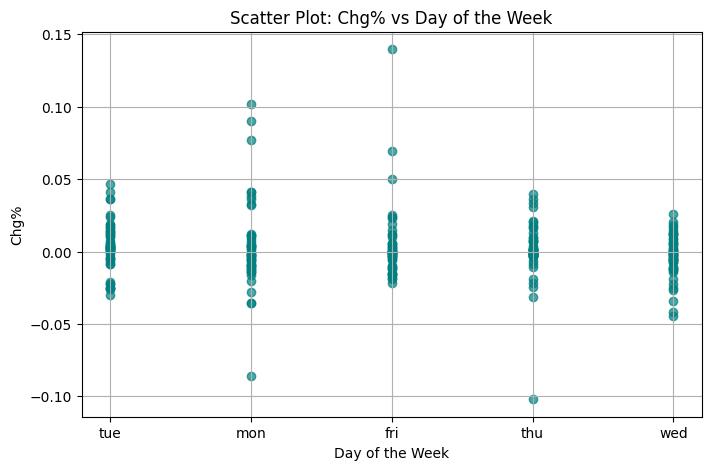

In [20]:
# A3 - The IRCTC Stock Price Analysis

import pandas as pd
import statistics
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv("IRCTC_Stock_Price.csv")

# Striping the column names of whitespace
df.columns = df.columns.str.strip()

# Cleaning required columns
df = df.dropna(subset=['Price', 'Day', 'Chg%'])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Chg%'] = pd.to_numeric(df['Chg%'], errors='coerce')
df = df.dropna(subset=['Price', 'Chg%'])

# 1. Mean and Variance
price_mean1 = statistics.mean(df['Price'])
price_variance1 = statistics.variance(df['Price'])

print("Mean of Price:", round(price_mean1, 2))
print("Variance of Price:", round(price_variance1, 2))

# 2. Mean Price for Wednesdays
df['Day'] = df['Day'].astype(str).str.strip().str.lower()
wednesdays1 = df[df['Day'].str.contains('wed')]

if not wednesdays1.empty:
    wednesday_mean1 = statistics.mean(wednesdays1['Price'])
    print("Mean Price on Wednesdays:", round(wednesday_mean1, 2))
else:
    print("No data available for Wednesdays.")

# 3. Mean Price for April
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
april_data1 = df[df['Date'].dt.month == 4]

if not april_data1.empty:
    april_mean1 = statistics.mean(april_data1['Price'])
    print("Mean Price in April:", round(april_mean1, 2))
else:
    print("No data for April.")

# 4. Probability of Loss (Chg% < 0)
loss_days1 = df[df['Chg%'] < 0]
loss_prob1 = len(loss_days1) / len(df)
print("Probability of Loss (Chg% < 0):", round(loss_prob1, 3))

# 5. Probability of Profit on Wednesday
profit_wed1 = wednesdays1[wednesdays1['Chg%'] > 0]

if not wednesdays1.empty:
    profit_wed_prob1 = len(profit_wed1) / len(wednesdays1)
    print("P(Profit | Wednesday):", round(profit_wed_prob1, 3))
else:
    print("P(Profit | Wednesday): Not available due to no Wednesday data.")

# 6. Conditional Probability (Profit | Wednesday)
profit_days1 = df[df['Chg%'] > 0]
if not profit_days1.empty and not profit_wed1.empty:
    conditional_prob1 = len(profit_wed1) / len(profit_days1)
    print("Conditional P(Profit | Wednesday):", round(conditional_prob1, 3))
else:
    print("Conditional probability not computable.")

# 7. Scatter Plot of Chg% vs Day
plt.figure(figsize=(8, 5))
plt.scatter(df['Day'], df['Chg%'], alpha=0.7, color='teal')
plt.title("Scatter Plot: Chg% vs Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Chg%")
plt.grid(True)
plt.show()

In [21]:
# A4 - Dataset Exploration: Data types, missing values, stats, encoding suggestions

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Function to perform exploration on the DataFrame
def exploring_data(df):
    # 1. Get data types of all columns
    data_types = df.dtypes

    # 2. Check for missing values in each column
    missing1 = df.isnull().sum()

    # 3. Get summary statistics for numerical columns
    stats1 = df.describe()

    # 4. Identify categorical columns (object type)
    cat_cols1 = df.select_dtypes(include=['object']).columns.tolist()

    # 5. Label Encoding for each categorical column
    label_encoded_df1 = df.copy()
    encoder1 = LabelEncoder()
    for col in cat_cols1:
        label_encoded_df1[col] = encoder1.fit_transform(label_encoded_df1[col].astype(str))

    # 6. One-Hot Encoding for categorical columns
    onehot_df1 = pd.get_dummies(df, columns=cat_cols1)

    # 7. Mean, std, and variance for numerical columns
    num_cols1 = df.select_dtypes(include=[np.number]).columns.tolist()
    stats_dict1 = {
        col: {
            "mean": df[col].mean(),
            "std": df[col].std(),
            "var": df[col].var()
        }
        for col in num_cols1
    }

    return {
        "data_types": data_types,
        "missing_values": missing1,
        "statistics": stats1,
        "categorical_columns": cat_cols1,
        "label_encoded": label_encoded_df1,
        "onehot_encoded": onehot_df1,
        "numeric_columns": num_cols1,
        "stats_summary": stats_dict1
    }

# Loading dataset
df = pd.read_csv("thyroid0387_UCI.csv")

# Run exploration function
explore1 = exploring_data(df)

# Display A4 outputs
print("A4: Data Types:\n", explore1["data_types"])
print("\nMissing Values:\n", explore1["missing_values"])
print("\nDescriptive Stats:\n", explore1["statistics"])
print("\nCategorical Columns:", explore1["categorical_columns"])

# Display the mean, std, and variance for each numeric column
print("\nMean, Std Dev & Variance of Numeric Columns:")
for col, values in explore1["stats_summary"].items():
    print(f"{col}: Mean = {values['mean']:.2f}, Std = {values['std']:.2f}, Variance = {values['var']:.2f}")

A4: Data Types:
 Record ID                     int64
age                           int64
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measure

In [22]:
# A5 - The Jaccard & Simple Matching Coefficient

import pandas as pd
import numpy as np

# Loading dataset
df = pd.read_csv("thyroid0387_UCI.csv")

# Detecting binary 't'/'f' columns
binary_cols1 = [col for col in df.columns if set(df[col].dropna().unique()).issubset({'t', 'f'})]

# Replacing 't'/'f' with 1/0 and cast cleanly to avoid warnings
binary_df1 = df[binary_cols1].replace({'t': 1, 'f': 0}).infer_objects(copy=False).astype(int)

# First two rows
v1 = binary_df1.iloc[0]
v2 = binary_df1.iloc[1]

# Similarity scores
f11 = ((v1 == 1) & (v2 == 1)).sum()
f00 = ((v1 == 0) & (v2 == 0)).sum()
f10 = ((v1 == 1) & (v2 == 0)).sum()
f01 = ((v1 == 0) & (v2 == 1)).sum()

jc1 = f11 / (f11 + f10 + f01)
smc1 = (f11 + f00) / (f11 + f00 + f10 + f01)

# Output
print("Similarity between first two binary vectors:")
print("f11 =", f11)
print("f00 =", f00)
print("f10 =", f10)
print("f01 =", f01)
print("Jaccard Coefficient (JC) =", round(jc1, 3))
print("Simple Matching Coefficient (SMC) =", round(smc1, 3))

Similarity between first two binary vectors:
f11 = 1
f00 = 16
f10 = 1
f01 = 2
Jaccard Coefficient (JC) = 0.25
Simple Matching Coefficient (SMC) = 0.85


/tmp/ipython-input-22-4005315650.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_df1 = df[binary_cols1].replace({'t': 1, 'f': 0}).infer_objects(copy=False).astype(int)


In [23]:
# A6 - The Cosine Similarity Between First Two Rows

import pandas as pd
import numpy as np
from numpy.linalg import norm

# Loading the dataset
df = pd.read_csv("thyroid0387_UCI.csv")

# Droping non-numeric columns
numeric_df1 = df.select_dtypes(include=['int64', 'float64']).dropna()

# Take first two vectors (full row, all numeric attributes)
v11 = numeric_df1.iloc[0].values
v22 = numeric_df1.iloc[1].values

# Computing Cosine Similarity
dot_product1 = np.dot(v11, v22)
magnitude1 = norm(v11) * norm(v22)
cosine_similarity1 = dot_product1 / magnitude1 if magnitude1 != 0 else 0

# Output
print("A6 - Cosine Similarity")
print("Cosine Similarity between first 2 rows:", round(cosine_similarity1, 3))

A6 - Cosine Similarity
Cosine Similarity between first 2 rows: 1.0


/tmp/ipython-input-24-2805757721.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_df = df[binary_cols].replace({'t': 1, 'f': 0}).astype(int)


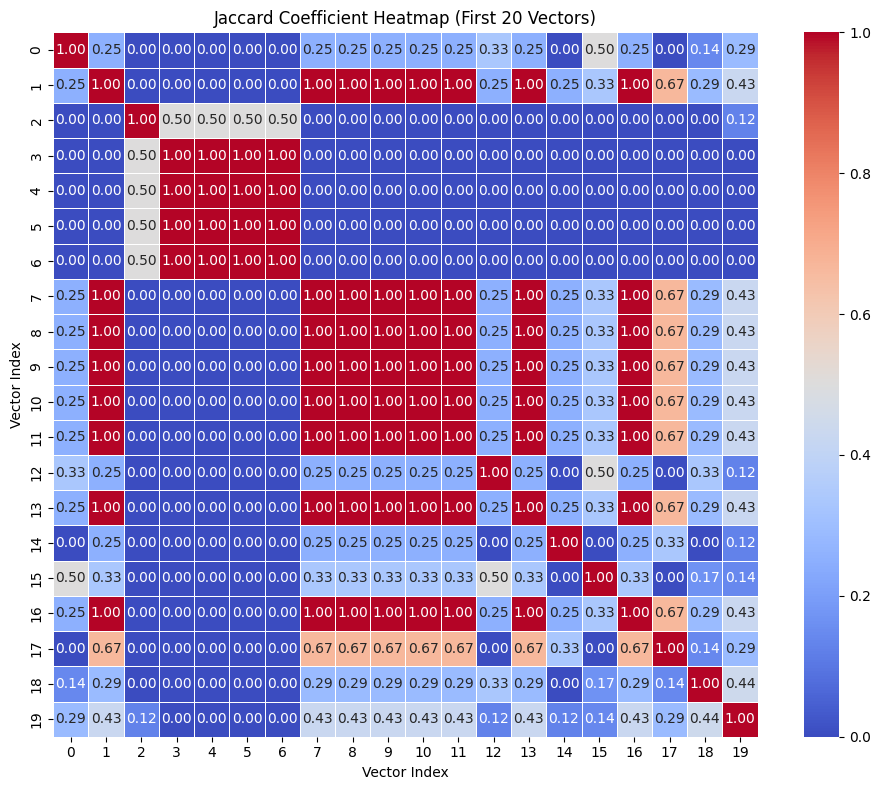

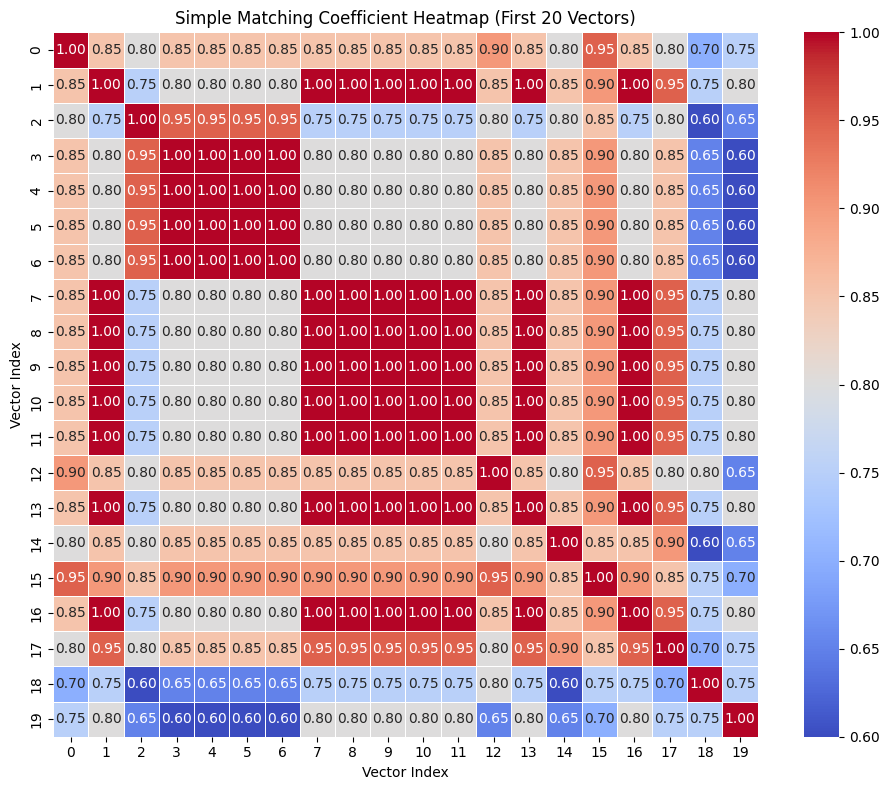

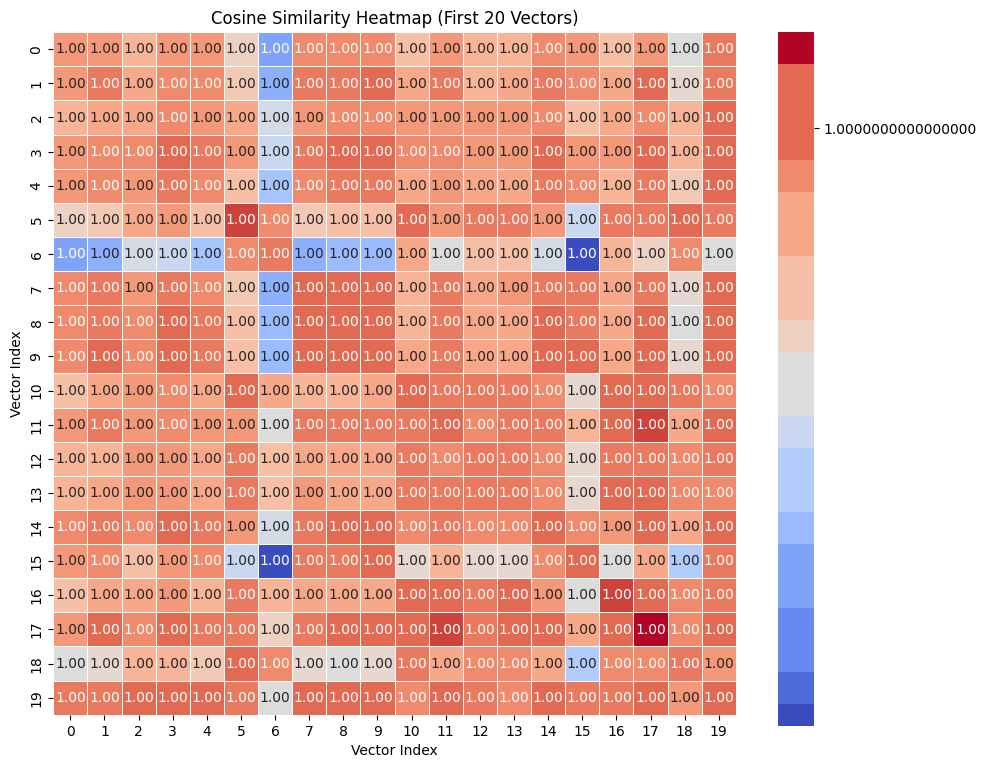

In [24]:
# A7: Heatmap of JC, SMC, COS Similarity for First 20 Vectors
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Load Data from CSV
def load_data(file_path: str) -> pd.DataFrame:
    return pd.read_csv(file_path)

# Step 2: Extract Binary Columns (t/f -> 1/0)
def get_binary_df(df: pd.DataFrame) -> pd.DataFrame:
    binary_cols = [col for col in df.columns if set(df[col].dropna().unique()).issubset({'t', 'f'})]
    binary_df = df[binary_cols].replace({'t': 1, 'f': 0}).astype(int)
    return binary_df

# Step 3: Label Encode All Attributes (for Cosine)
def encode_all_attributes(df: pd.DataFrame) -> pd.DataFrame:
    encoded_df = df.copy()
    for col in encoded_df.columns:
        if encoded_df[col].dtype == 'object':
            encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col].astype(str))
    return encoded_df

# Step 4: JC & SMC Calculation Between Two Vectors
def jc_smc(vec1, vec2):
    f11 = np.sum((vec1 == 1) & (vec2 == 1))
    f00 = np.sum((vec1 == 0) & (vec2 == 0))
    f10 = np.sum((vec1 == 1) & (vec2 == 0))
    f01 = np.sum((vec1 == 0) & (vec2 == 1))
    jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
    smc = (f11 + f00) / (f11 + f00 + f10 + f01) if (f11 + f00 + f10 + f01) != 0 else 0
    return jc, smc

# Step 5: Compute JC and SMC Matrices
def compute_jc_smc_matrix(binary_df: pd.DataFrame) -> tuple:
    n = binary_df.shape[0]
    jc_matrix = np.zeros((n, n))
    smc_matrix = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            jc, smc = jc_smc(binary_df.iloc[i], binary_df.iloc[j])
            jc_matrix[i][j] = jc
            smc_matrix[i][j] = smc
    return jc_matrix, smc_matrix

# Step 6: Cosine Similarity Matrix
def compute_cosine_matrix(df: pd.DataFrame) -> np.ndarray:
    return cosine_similarity(df)

# Step 7: Plot Heatmaps
def plot_heatmap(matrix: np.ndarray, title: str):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
    plt.title(title)
    plt.xlabel("Vector Index")
    plt.ylabel("Vector Index")
    plt.tight_layout()
    plt.show()

# MAIN EXECUTION
if __name__ == "__main__":
    # Replace with your CSV file path
    file_path = "thyroid0387_UCI.csv"

    # Step 1: Load data
    df = load_data(file_path)

    # Step 2: Select first 20 rows
    df_20 = df.head(20)

    # Step 3: Get binary and encoded versions
    binary_df = get_binary_df(df_20)
    encoded_df = encode_all_attributes(df_20)

    # Step 4: Compute JC and SMC matrices
    jc_matrix, smc_matrix = compute_jc_smc_matrix(binary_df)

    # Step 5: Compute cosine similarity matrix
    cosine_matrix = compute_cosine_matrix(encoded_df)

    # Step 6: Plot heatmaps
    plot_heatmap(jc_matrix, "Jaccard Coefficient Heatmap (First 20 Vectors)")
    plot_heatmap(smc_matrix, "Simple Matching Coefficient Heatmap (First 20 Vectors)")
    plot_heatmap(cosine_matrix, "Cosine Similarity Heatmap (First 20 Vectors)")

In [25]:
# A8: Data Imputation
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# A8 - Impute missing values
def impute_missing_values(data):
    df_clean = data.replace('?', np.nan).copy()

    # Convert columns to numeric where applicable
    for col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')

    # Impute numeric columns
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            skew = df_clean[col].dropna().skew()
            strategy = 'mean' if abs(skew) < 1 else 'median'
            df_clean[[col]] = SimpleImputer(strategy=strategy).fit_transform(df_clean[[col]])

    # Impute categorical columns
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[[col]] = SimpleImputer(strategy='most_frequent').fit_transform(df_clean[[col]])

    return df_clean

# Example Execution for A8
df = pd.read_csv("thyroid0387_UCI.csv")
df_imputed = impute_missing_values(df)
print("A8: Missing values handled.")
print(df_imputed.info())
print(df_imputed.head())

A8: Missing values handled.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record ID                  9172 non-null   int64  
 1   age                        9172 non-null   int64  
 2   sex                        9172 non-null   object 
 3   on thyroxine               9172 non-null   object 
 4   query on thyroxine         9172 non-null   object 
 5   on antithyroid medication  9172 non-null   object 
 6   sick                       9172 non-null   object 
 7   pregnant                   9172 non-null   object 
 8   thyroid surgery            9172 non-null   object 
 9   I131 treatment             9172 non-null   object 
 10  query hypothyroid          9172 non-null   object 
 11  query hyperthyroid         9172 non-null   object 
 12  lithium                    9172 non-null   object 
 13  goitre              

/tmp/ipython-input-25-88548038.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_clean[col] = pd.to_numeric(df_clean[col], errors='ignore')


In [26]:
# A9 - Data Normalization / Scaling

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Loading dataset
df = pd.read_csv("thyroid0387_UCI.csv")

# Select the numeric columns
numeric_df1 = df.select_dtypes(include=['float64', 'int64']).dropna()

# 1. Min-Max Scaling (0 to 1)
minmax_scaler1 = MinMaxScaler()
minmax_scaled1 = minmax_scaler1.fit_transform(numeric_df1)
minmax_df1 = pd.DataFrame(minmax_scaled1, columns=numeric_df1.columns)

print("\n---Min-Max Normalized Data (First 5 Rows) ---")
print(minmax_df1.head())

# 2. Z-Score Standardization (mean=0, std=1)
zscore_scaler1 = StandardScaler()
zscore_scaled1 = zscore_scaler1.fit_transform(numeric_df1)
zscore_df1 = pd.DataFrame(zscore_scaled1, columns=numeric_df1.columns)

print("\n--- Z-Score Standardized Data (First 5 Rows) ---")
print(zscore_df1.head())


---Min-Max Normalized Data (First 5 Rows) ---
      Record ID       age
0  0.000000e+00  0.000427
1  3.410871e-08  0.000427
2  9.891527e-07  0.000610
3  6.934301e-05  0.000534
4  6.937712e-05  0.000473

--- Z-Score Standardized Data (First 5 Rows) ---
   Record ID       age
0  -1.602090 -0.037634
1  -1.602090 -0.037634
2  -1.602086 -0.027499
3  -1.601822 -0.031722
4  -1.601822 -0.035100


In [27]:
# O1 - Square Matrix AX = C (Subset Testing)

import pandas as pd
import numpy as np
from numpy.linalg import pinv

# Loading dataset
df = pd.read_csv("Purchase_data.csv")

# Select the relevant columns and clean
df_clean = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']].dropna()

# Define E and F from full dataset
E_full = df_clean[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
F_full = df_clean[['Payment (Rs)']].values
Z_full = pinv(E_full).dot(F_full)

# Pick 3 random square matrices (3x3)
E_sq1 = E_full[:3, :]
F_sq1 = F_full[:3, :]
Z_sq1 = pinv(E_sq1).dot(F_sq1)

E_sq2 = E_full[-3:, :]
F_sq2 = F_full[-3:, :]
Z_sq2 = pinv(E_sq2).dot(F_sq2)

# Compare
print("--- O1: Square Matrix Solutions ---")
print("Full Data Estimated Costs (Original Z):")
print("Candies:", round(Z_full[0][0], 2),
      "Mangoes:", round(Z_full[1][0], 2),
      "Milk:", round(Z_full[2][0], 2))

print("\nSubset 1 (Top 3 rows) Estimated Z:")
print("Candies:", round(Z_sq1[0][0], 2),
      "Mangoes:", round(Z_sq1[1][0], 2),
      "Milk:", round(Z_sq1[2][0], 2))

print("\nSubset 2 (Bottom 3 rows) Estimated Z:")
print("Candies:", round(Z_sq2[0][0], 2),
      "Mangoes:", round(Z_sq2[1][0], 2),
      "Milk:", round(Z_sq2[2][0], 2))

--- O1: Square Matrix Solutions ---
Full Data Estimated Costs (Original Z):
Candies: 1.0 Mangoes: 55.0 Milk: 18.0

Subset 1 (Top 3 rows) Estimated Z:
Candies: 1.0 Mangoes: 55.0 Milk: 18.0

Subset 2 (Bottom 3 rows) Estimated Z:
Candies: 1.0 Mangoes: 55.0 Milk: 18.0


In [28]:
# O2 - Safe Random Sampling for Repeating A5–A6
import pandas as pd

# Loading the thyroid dataset
df = pd.read_csv("thyroid0387_UCI.csv")

# Droping rows with missing values (as in A5–A6)
clean_df1 = df.dropna().reset_index(drop=True)

# Checking how many clean rows are available
print("Available clean rows:", len(clean_df1))

# Using the available rows (min between 20 or actual rows)
n_rows1 = min(20, len(clean_df1))

# Now sample safely
sample_df1 = clean_df1.sample(n=n_rows1, random_state=42).reset_index(drop=True)

print(f"Sampled {n_rows1} rows for optional experiments")
print(sample_df1.head())

Available clean rows: 9172
Sampled 20 rows for optional experiments
   Record ID  age sex on thyroxine query on thyroxine  \
0  841003032   72   M            f                  f   
1  860408064   57   F            f                  f   
2  850612010   82   M            f                  f   
3  851217005   58   F            f                  f   
4  870109043   80   M            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured   T4U FTI measured  FTI TBG measured TBG  \
0            t   81      

In [29]:
# O3 - Loading marketing_campaign
mc_df1 = pd.read_csv("marketing_campaign.csv")

# Exploring structure and perform A4–A7 style analysis
print(mc_df1.head())
print(mc_df1.info())
print(mc_df1.describe(include='all'))

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

           Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0  2012-04-09 00:00:00       58       635  ...                  7   
1  2014-08-03 00:00:00       38        11  ...                  5   
2           21-08-2013       26       426  ...                  4   
3  2014-10-02 00:00:00       26        11  ...                  6   
4           19-01-2014       94       173  ...                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0            

Colab now has AI features powered by [Gemini](https://gemini.google.com). The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  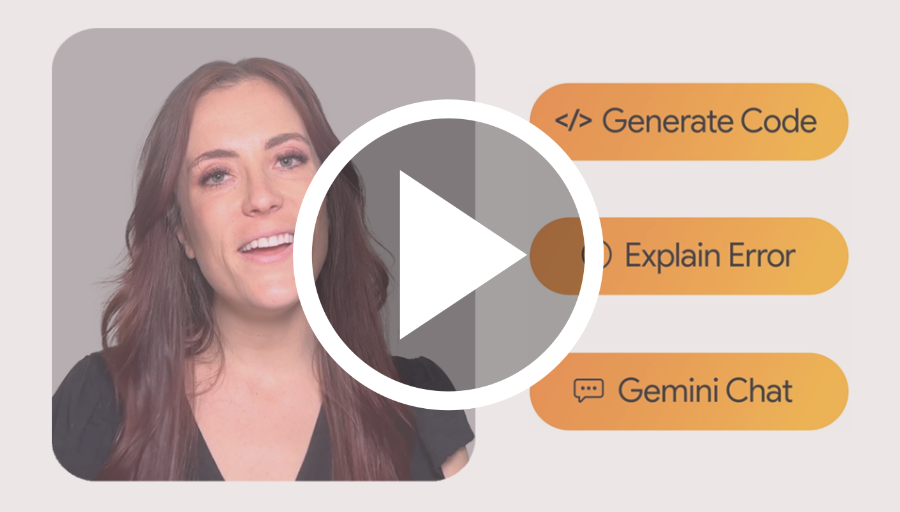
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [30]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [31]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

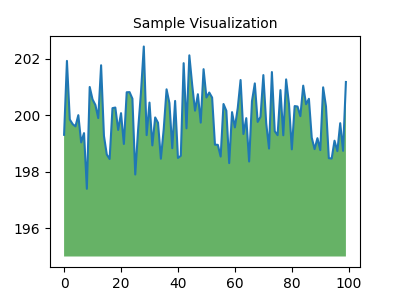

In [32]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning

<div>

These are a few of the notebooks related to Machine Learning, including Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting Started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
